In [1]:
import numpy as np
import os
import threading
import operator
import pickle
import re
import pandas as pd
from collections import Counter
from tqdm import tqdm_notebook as tqdm
from datetime import datetime
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
from tqdm import tqdm_notebook as tqdm
%config InlineBackend.figure_format = 'retina'
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import acf

start_time = 1190146243   
end_time = 1192994591

/home/xuanli2/penv/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
def dump_data(data, output_name):
    with open(output_name, 'wb') as f:
        pickle.dump(data, f)

def load_data(input_name):
    with open(input_name, 'rb') as f:
        data = pickle.load(f)
    return data

In [24]:
from pandas import Series
from matplotlib import pyplot

In [13]:
access_by_hour = load_data("data/dump/access_by_hour.pkl")

In [14]:
def update_sorted_by_access(dictionary):
    tuples = [(index, dictionary[index]) for index in dictionary.keys()] 
    return sorted(tuples, key = lambda x: x[0]) 

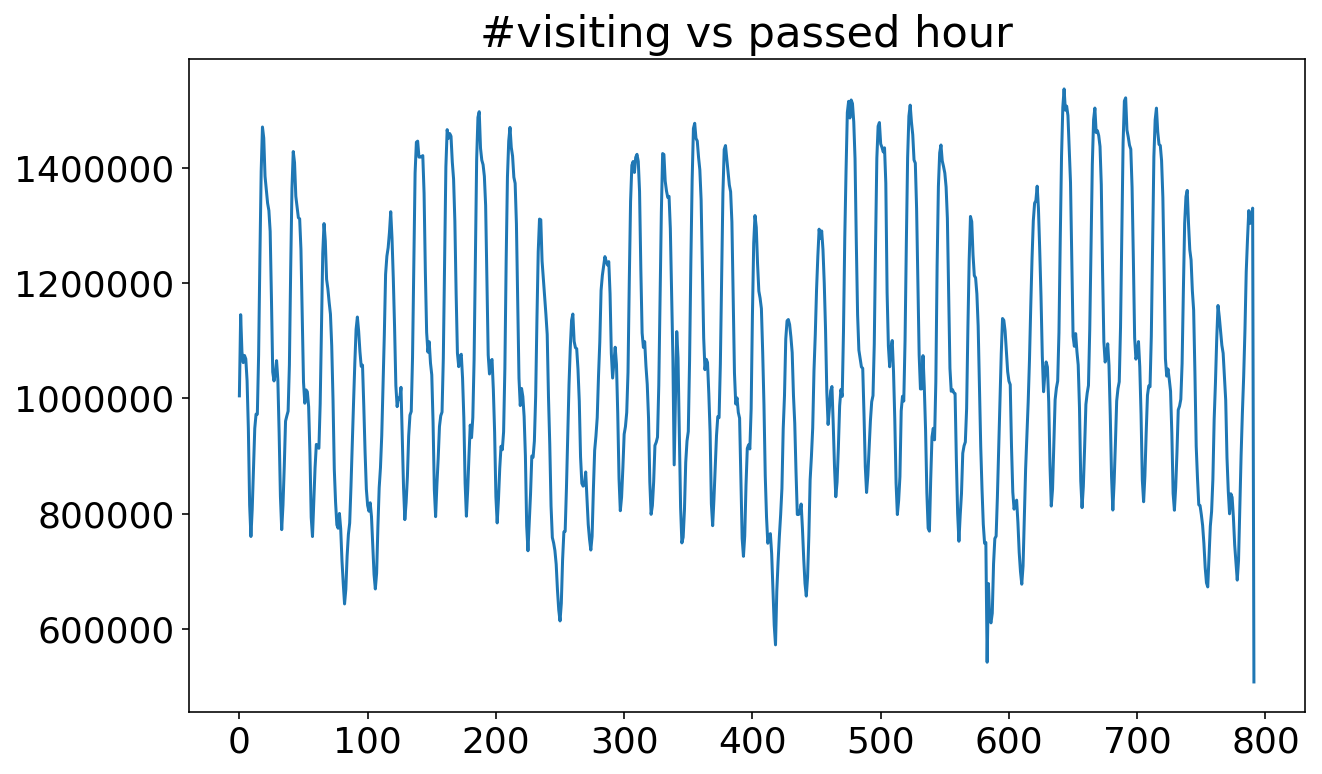

In [15]:
matplotlib.rcParams.update({'font.size': 18})
series = update_sorted_by_access(access_by_hour)
plt.figure(figsize=(10,6))
plt.title('#visiting vs passed hour')
plt.plot(range(len(series)),[data[1] for data in series])

In [78]:
from datetime import timedelta
def hour_to_datetime(hour):
    return datetime(2007,9,1) + timedelta(hours=hour)

series = {hour_to_datetime(data[0]): data[1] for data in series}


TypeError: 'datetime.datetime' object is not subscriptable

In [120]:
bucket = {(data[0].month, data[0].day):[] for data in series}

TypeError: 'datetime.datetime' object is not subscriptable

In [65]:
for data in series:
    index = (key[0], key[1])
    hour = key[2]
    bucket[index].append((hour, access_by_hour[key]))

TypeError: 'float' object is not subscriptable

In [36]:
for key in bucket:
    bucket[key] = sorted(bucket[key], key=lambda x: x[1], reverse=True)

NameError: name 'bucket' is not defined

In [37]:
bucket

NameError: name 'bucket' is not defined

In [45]:
from datetime import datetime

access_by_day = {}

for time in times:
    date = datetime.fromtimestamp(time)
    index = (date.month, date.day)
    if index in access_by_day:
        access_by_day[index] += times[time]
    else:
        access_by_day[index] = times[time]

NameError: name 'times' is not defined

In [57]:
dump_data(access_by_day,"data/dump/access_by_day.pkl")

In [58]:
l = sorted([(key,access_by_day[key]) for key in access_by_day], key=lambda x: x[0])

<BarContainer object of 0 artists>

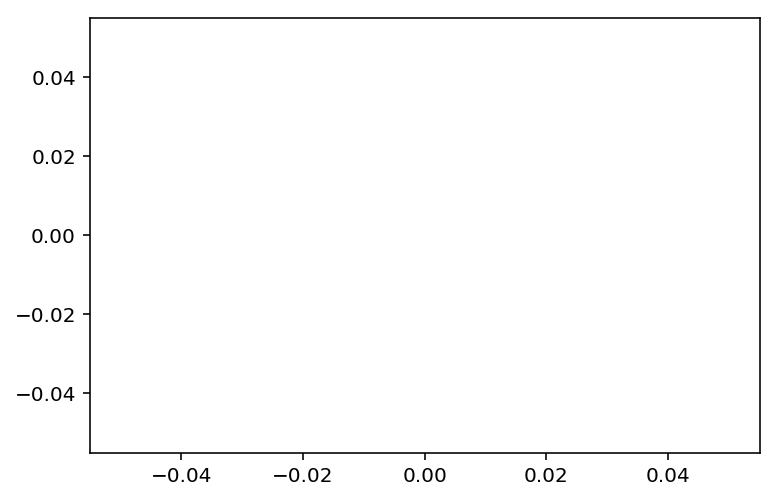

In [59]:
plt.bar(range(len(l)), [data[1] for data in l])

In [44]:
access_by_day

{}

In [19]:
data2 = load_data('data/dump/access_by_hour.pkl')

In [20]:
type(data2)

dict

In [21]:
passed_hour = []
access_per_hour = []
for x,y in data2.items():
    passed_hour.append(x)
    access_per_hour.append(y)

In [22]:
type(passed_hour)

list

In [23]:
passed_hour[1:10]

[429.0, 430.0, 431.0, 432.0, 433.0, 434.0, 435.0, 436.0, 437.0]

In [24]:
access_per_hour[1:10]

[1145141, 1080524, 1061967, 1074380, 1068372, 1030628, 947552, 814671, 760219]

In [25]:
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

/home/xuanli2/penv/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


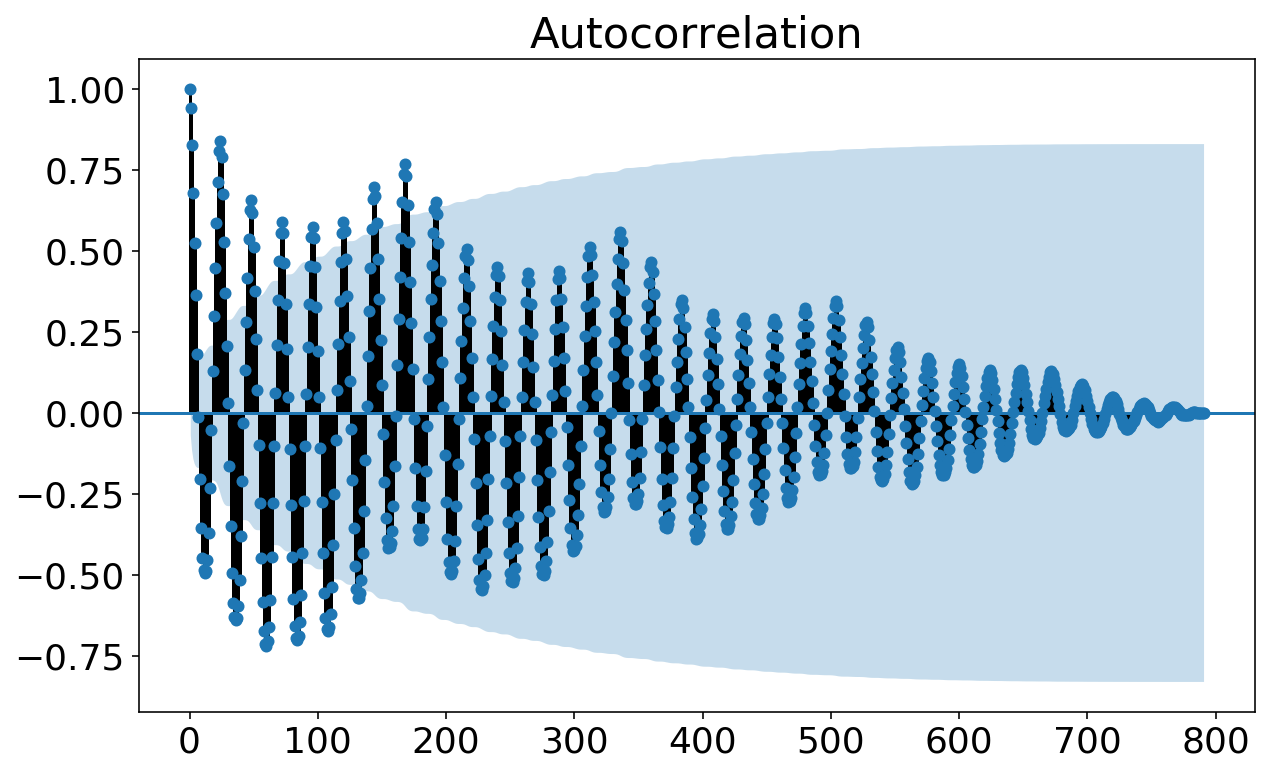

In [26]:
fig,ax=plt.subplots(1,1,figsize=(10,6))
plot_acf(access_per_hour,alpha=0.05, use_vlines=True, ax=ax).show()

/home/xuanli2/penv/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


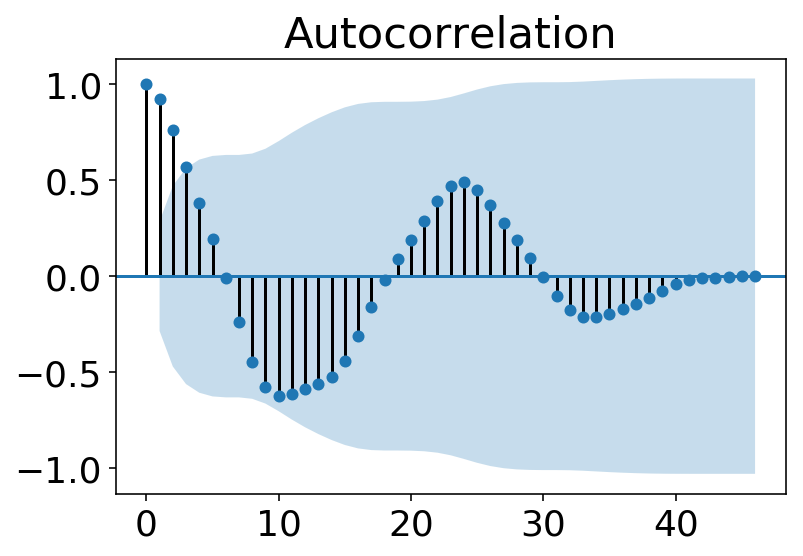

In [27]:
#From acf plot, we can easily see the periodic effect
matplotlib.rcParams.update({'font.size': 18})
time_series = access_per_hour[1:48]
time_series = time_series - np.mean(time_series)
plot_acf(time_series,alpha=0.05, use_vlines=True).show() 

In [168]:
X=[('Monday', 1154764.25),
 ('Tuesday', 1139720.54),
 ('Wednesday', 1142978.55),
 ('Thursday', 1123634.65),
 ('Friday', 1025517.45),
 ('Saturday', 879366.8666666667),
 ('Sunday', 988040.7931034482)]
type(X)
len(X)
X[1][1]

1139720.54

In [171]:
y = []
for i in range(0,7):
    y.append(X[i][1])
y

[1154764.25,
 1139720.54,
 1142978.55,
 1123634.65,
 1025517.45,
 879366.8666666667,
 988040.7931034482]

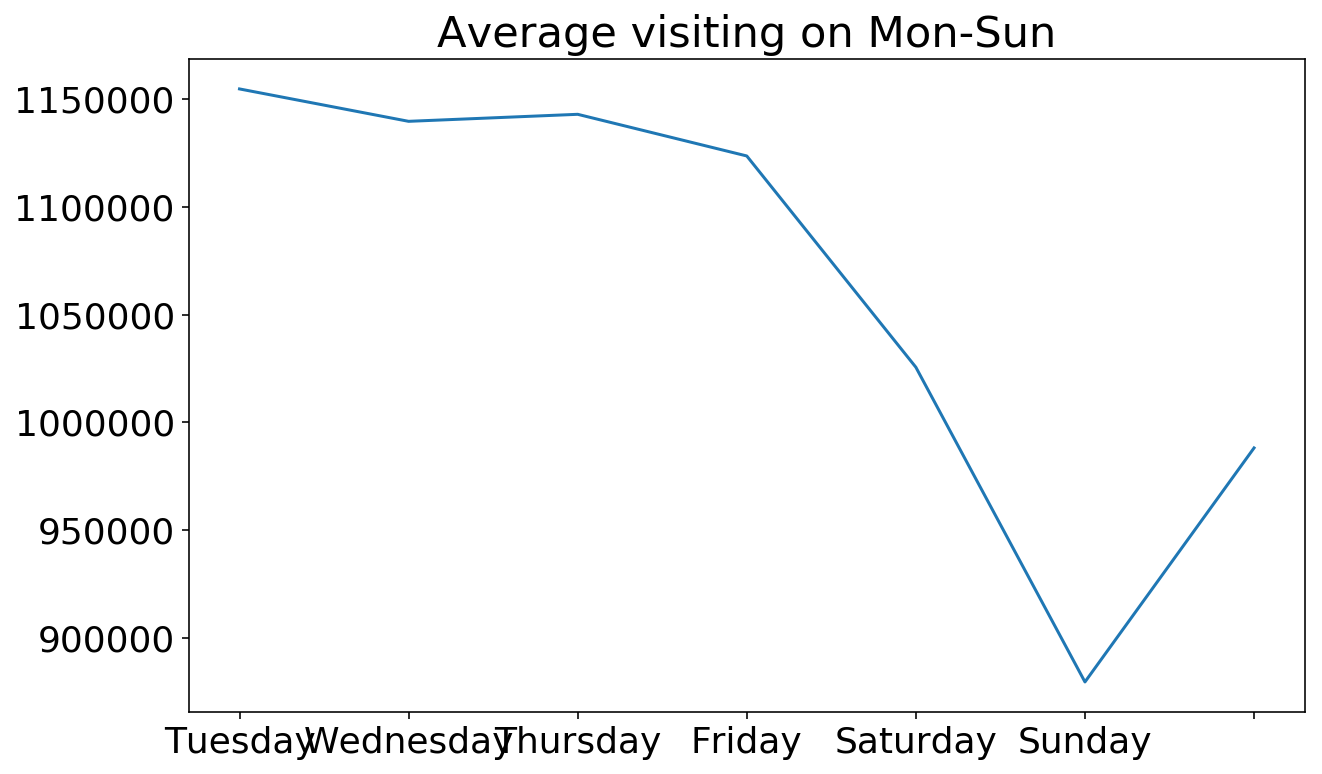

In [185]:
#y = [1154764.25,1139720.54,1142978.55,1123634.65,1025517.45,879366.8666666667,988040.7931034482]
#x = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#plt.xlabel(xlabel)
plt.figure(figsize=(10,6))
plt.gca().set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);
plt.title('Average visiting on Mon-Sun')
plt.plot(y)

In [ ]:
#Hypothesis:mean of visit on weekday is higher than on weekend
#two-sample t-test

In [173]:
access_by_weekday =  load_data('data/dump/bucket_by_weekday.pkl')
Monday =list(access_by_weekday['Monday'])
Tuesday = list(access_by_weekday['Tuesday'])
Wednesday = list(access_by_weekday['Wednesday'])
Thursday = list(access_by_weekday['Thursday'])
Friday = list(access_by_weekday['Friday'])
Saturday = list(access_by_weekday['Saturday'])
Sunday = list(access_by_weekday['Sunday'])

{'Friday': [981953,
  797387,
  1015118,
  800471,
  1306503,
  893868,
  1008210,
  1240984,
  842618,
  1315635,
  1209085,
  917605,
  1181181,
  834705,
  1121985,
  1125520,
  1020439,
  1213033,
  916435,
  751974,
  904816,
  1009961,
  1248861,
  924195,
  1122735,
  1303252,
  920035,
  1146162,
  998059,
  915722,
  913313,
  793636,
  1251472,
  1206448,
  905148,
  1011344,
  1014582,
  990694,
  760151,
  819612,
  1091064,
  879315,
  1166406,
  985403,
  820070,
  876836,
  1190161,
  1273006,
  979934,
  998372,
  805803,
  1360836,
  1186627,
  1303775,
  1044483,
  1012405,
  861397,
  1303427,
  986381,
  845329,
  1349837,
  1060560,
  1257642,
  939300,
  1187757,
  906384,
  834849,
  1240134,
  1050908,
  916949,
  1153196,
  1032889,
  833637,
  1311071,
  778690,
  1207835,
  1145571,
  968535,
  1017185,
  785184,
  1254677,
  1178646,
  1238280,
  900271,
  1002179,
  1309853,
  919715,
  899952,
  925793,
  1002986,
  735465,
  1137586,
  1003316,
  813081,


In [177]:
weekday = Monday+Tuesday+Wednesday+Thursday+Friday
weekend = Saturday + Sunday

In [39]:
scipy.stats.ttest_ind(weekday,weekend,equal_var=False)

NameError: name 'weekday' is not defined

In [77]:
from datetime import datetime
from datetime import timedelta
def update_sorted_by_access(dictionary):
    tuples = [(index, dictionary[index]) for index in dictionary.keys()] 
    return sorted(tuples, key = lambda x: x[0]) 


access_by_hour = load_data("data/dump/access_by_hour.pkl")
series = update_sorted_by_access(access_by_hour)

from datetime import timedelta
def hour_to_datetime(hour):
    return datetime(2007,9,1) + timedelta(hours=hour)

series = {hour_to_datetime(data[0]): data[1] for data in series}

bucket_by_weeks = {38: [], 39: [], 40: [], 41: [], 42: []}
for index,count in series.items():
    weekno = date(index.year, index.month, index.day).isocalendar()[1] 
    if weekno in bucket_by_weeks:
        bucket_by_weeks[date(index.year, index.month, index.day).isocalendar()[1]].append(count)

# Two-sample ks test

In [76]:
from scipy.stats import ks_2samp
print("Week 39 and 40", ks_2samp(bucket_by_weeks[39], bucket_by_weeks[40]))
print("Week 40 and 41", ks_2samp(bucket_by_weeks[40], bucket_by_weeks[41]))
print("Week 41 and 42", ks_2samp(bucket_by_weeks[41], bucket_by_weeks[42]))

Week 39 and 40 Ks_2sampResult(statistic=0.06547619047619047, pvalue=0.852499629811771)
Week 40 and 41 Ks_2sampResult(statistic=0.08333333333333337, pvalue=0.5856933951622363)
Week 41 and 42 Ks_2sampResult(statistic=0.08594657375145176, pvalue=0.5534353719549807)
